## 3) ANALISI DEL PRIMO PROFILO STRATIGRAFICO

### 3.1 Precipitazione estrema 

Si analizza il fenomeno dell'infiltrazione in una colonna di suolo prendendo in considerazione una precipitazione di forte intensità (56,2 mm) sviluppatasi tra le 16.30 e le 17.00 del 25/12/2020.

#### **Definizione della griglia**

**- grid_input_file_name** :  `/data/Grid_input/dati_colonna1VG.csv`

**- ic_input_file_name** :  `/data/Grid_input/dati_colonna1_IC.csv`

**- parameter_input_file_name** : `/data/Grid_input/Richards_VG.csv`

**- grid_type** : `classical`

**- psi_interp_model** : `linear`

**- T_interp_model** : `linear`

**- output_file_name** : `/data/Grid_NetCDF/colonna1_Grid.nc`

---

#### **Creazione della griglia**

In [1]:
import os
import pandas as pd
from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf
import warnings
warnings.filterwarnings('ignore')

project_path = os.path.dirname(os.getcwd())

grid_input_file_name = project_path + "/data/Grid_input/dati_colonna1_VG_PPC.csv"
ic_input_file_name = project_path + "/data/Grid_input/dati_colonna1_IC.csv"
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'

dz_min = -9999 
dz_max = -9999 
b = -9999      

psi_interp_model = "linear"
T_interp_model = "linear"

output_file_name =  project_path + "/data/Grid_NetCDF/colonna1_Grid_1.nc"
output_title = '''Griglia di calcolo per colonna 1.
                  '''
output_summary = '''

'''
output_date = ''
output_institution = 'GEOframe'

In [2]:
data_grid = pd.read_csv(grid_input_file_name)
data_ic = pd.read_csv(ic_input_file_name)
data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_summary, output_date, output_institution, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\User\Desktop\OMS_Project_WHETGEO1D_Idrologia_ay_21_22/data/Grid_NetCDF/colonna1_Grid_1.nc



---

#### **Definizione dei parametri e delle condizioni al contorno**

Dopo aver creato il file netCDF relativo alla griglia, si prosegue con la simulazione utilizzando il simfile WHETGEO1D_sim1.sim, che permette di risolvere il problema di Richards. In tale file sono stati utilizzati i seguenti parametri :

- parametrizzazione della SWRC : **Van Genuchten**
- condizione al contorno sulla superficie : **Dirichlet**
- condizione al contorno al fondo : **free drainage** -> il gradiente della suzione **$\psi$ è 0**
- modello che tiene conto della temperatura del suolo: **Ronan1998**
- data d'inizio della simulazione : **25/12/2020 00:00**
- data di fine della simulazione : **26/12/2020 00:00**
- timestep : **1 (ogni minuto)**

---

#### **Post-processing**

#### Librerie

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 17,
        "legend.fontsize": 15,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58'])
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']
plt.rcParams.update(nice_fonts)

#### Visualizzazione del file di output

In [4]:
ds1 = xr.open_dataset(project_path + '/output/sim1_PE_0000.nc')
ds1

<xarray.Dataset>
Dimensions:           (depth: 150, dualDepth: 150, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.49 -1.47 -1.45 ... -0.0075 -0.0025
  * dualDepth         (dualDepth) float64 -1.5 -1.48 -1.46 ... -0.01 -0.005
  * time              (time) datetime64[ns] 2020-12-25 ... 2020-12-26
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex01.
    Top_boundary_condition:             Top Dirichlet
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\User\Desktop\OMS_Project_WHE...
    path_bottom_boundary_condition:     C:\Users\User\Desktop\OMS_Project_WHE...
    path_grid:                          C:\Users\User\Desktop\OMS_Project_WHE...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

#### Grafici 2-D

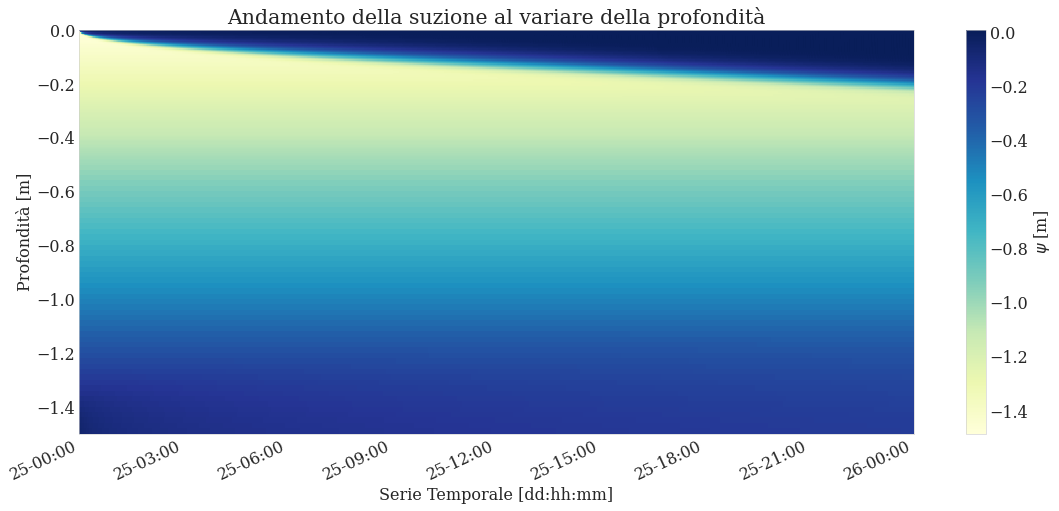

In [5]:
# Variazione della suzione nel tempo 

fig, ax = plt.subplots(1, 1, figsize=(16,12/1.618)) 

norm = matplotlib.colors.Normalize(vmin=np.amin(ds1.psi.values), vmax=np.amax(ds1.psi.values))
ds1.psi.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\psi$ [m]'})

ax.set_title('Andamento della suzione al variare della profondità')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Serie Temporale [dd:hh:mm]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M')) 
ax.xaxis.set_tick_params(rotation=25)

plt.tight_layout()
plt.show()

**Commento al grafico**

Il disequilibrio della lama d'acqua fa sì che l'acqua si muove verso il basso. Più il colore tende al bianco più il suolo è asciutto e la suzione è negativa; man mano che il blu diventa più intenso ci si sta sposta verso una suzione prossima a 0, ovvero verso la saturazione. 

Sulla superficie si osserva un fronte che si approfondisce all'avanzare del tempo (l'acqua entra nel dominio). In particolare a seguito della precipitazione avvenuta tra le 16:30 e le 17:00 il fronte di saturazione si approfondisce con una velocità maggiore.

Nell'istante iniziale il fondo è contraddistinto da un blu intenso e man mano che avanza il tempo il blu diminuisce la sua intensità (l'acqua esce dal fondo). Questo perchè nelle condizioni al contorno del fondo si è posta la variazione della suzione uguale a 0 (condizione di free drainage). 

---

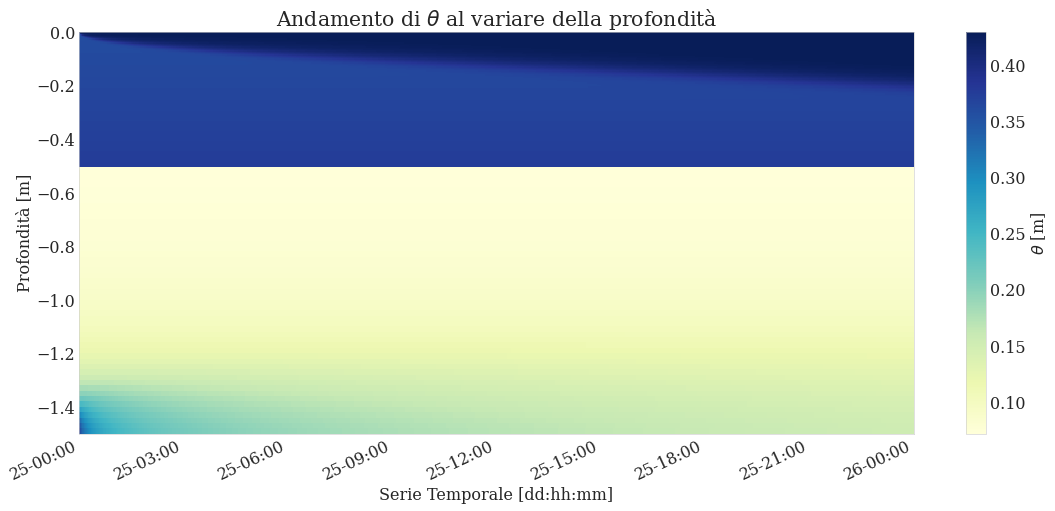

In [6]:
# Variazione del contenuto d'acqua nel tempo 

fig, ax = plt.subplots(1, 1, figsize=(16,12/1.618)) 

norm = matplotlib.colors.Normalize(vmin=np.amin(ds1.theta.values), vmax=np.amax(ds1.theta.values))
ds1.theta.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\\theta$ [m]'})

ax.set_title('Andamento di $\\theta$ al variare della profondità')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Serie Temporale [dd:hh:mm]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))

ax.xaxis.set_tick_params(rotation=25)

plt.tight_layout()
plt.show()

**Commento al grafico**

Il blu intenso corrisponde ad un contenuto d'acqua prossimo alla saturazione. Nella parte superficiale il suolo tende a saturare mentre nel fondo tende a diminuire il suo contenuto d'acqua.

Si nota come vi sia una marcata differenza di contenuto d'acqua tra i 2 strati della colonna di suolo a causa di una differente conducibilità idraulica.

---

#### Grafici 1-D

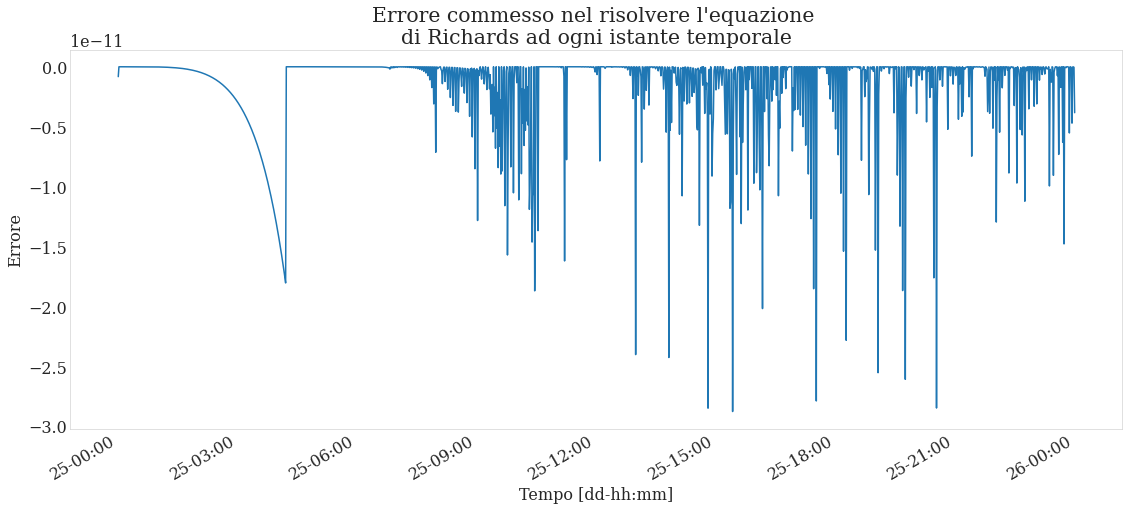

In [7]:
#Errore commesso nel risolvere l'equazione di Richards ad ogni istante temporale

fig, ax = plt.subplots(1, 1, figsize=(16, 12/1.618)) 
ds1.error.plot(ax=ax)

ax.set_title("Errore commesso nel risolvere l'equazione \ndi Richards ad ogni istante temporale")
ax.set_ylabel('Errore')
ax.set_xlabel('Tempo [dd-hh:mm]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))

plt.grid()
plt.tight_layout()
plt.show()

Errore molto piccolo (10^-11) legato alla precisizione del computer. Questo risultato permette di sapere se la simulazione è andata a buon fine.

---

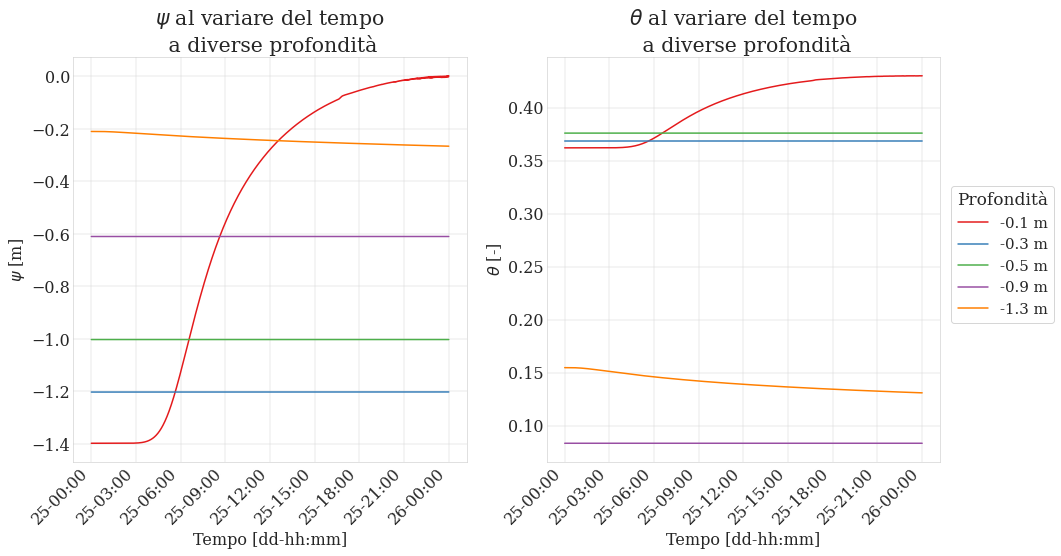

In [8]:
# Profilo della suzione e del contenuto d'acqua a diverse profondità

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 13/1.618)) 

ds1.psi.sel(depth=-0.1, method='nearest').plot(ax=ax1, color=colors[0])
ds1.psi.sel(depth=-0.3, method='nearest').plot(ax=ax1, color=colors[1])
ds1.psi.sel(depth=-0.5, method='nearest').plot(ax=ax1, color=colors[2])
ds1.psi.sel(depth=-0.9, method='nearest').plot(ax=ax1, color=colors[3])
ds1.psi.sel(depth=-1.3, method='nearest').plot(ax=ax1, color=colors[4])

ax1.set_title ('$\psi$ al variare del tempo \n a diverse profondità')
ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Tempo [dd-hh:mm]')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds1.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds1.theta.sel(depth=-0.3, method='nearest').plot(ax=ax2, label = '-0.3 m', color=colors[1])
ds1.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
ds1.theta.sel(depth=-0.9, method='nearest').plot(ax=ax2, label = '-0.9 m', color=colors[3])
ds1.theta.sel(depth=-1.3, method='nearest').plot(ax=ax2, label = '-1.3 m', color=colors[4])

ax2.set_title('$\\theta$ al variare del tempo \n a diverse profondità')
ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Tempo [dd-hh:mm]')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H:%M'))
ax2.xaxis.set_tick_params(rotation=45)
ax2.legend(bbox_to_anchor=(1.31,0.7), ncol=1, title='Profondità')

plt.tight_layout()
plt.show()

### **Commento ai grafici**

Nel grafico della suzione si osserva che nello strato composto da limo e argilla la variazione della suzione non è molto grande a causa della bassa permeabilità dello strato. 
Nel fondo la suzione parte da un valore prossimo a -0.2 e man mano che passa il tempo il suo valore diminuisce leggermente. La variazione è piccola perchè il flusso d'acqua che esce dal fondo è più piccolo rispetto a quello entrante dalla superficie.

Come già osservato nel grafico 2-D il contenuto d'acqua del primo strato della colonna di suolo (profondità fino a 0.5 m) è maggiore di quello del secondo strato. 

Si nota che in entrambi i grafici alla profondità di 0.3 m i parametri presi in considerazione subiscono un aumento a seguito della precipitazione. Inoltre alle profondità intermedie non si osservano ampie variazioni dei parametri a causa di un sotanziale equilibrio tra flusso entrante ed uscente.

---

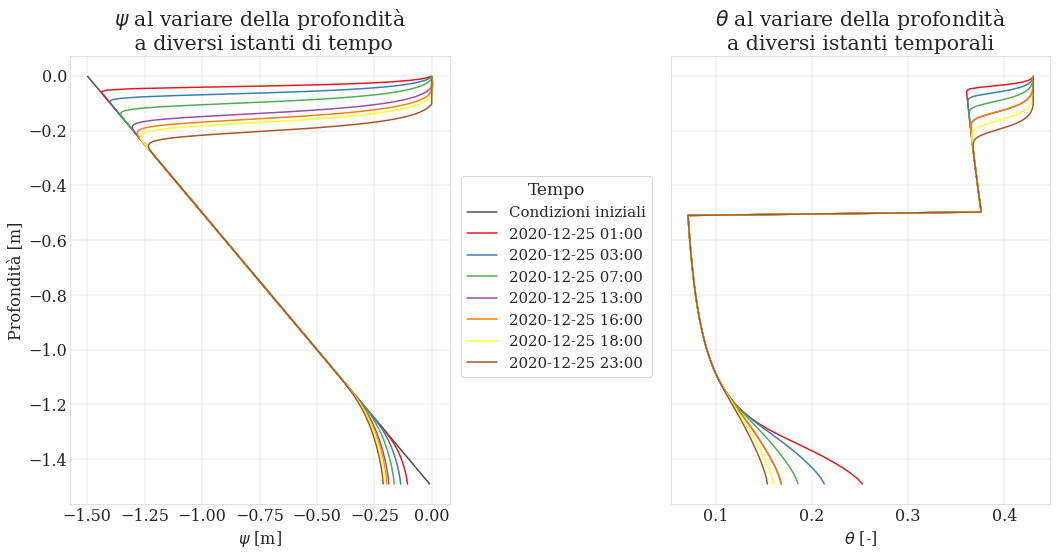

In [9]:
# Profilo della suzione e del contenuto d'acqua a diversi istanti temporali

fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(15, 13/1.618)) 

ds1.psiIC.plot(ax=ax1, y='depth', label='Condizioni iniziali', color='0.3')
ds1.psi.sel(time='2020-12-25 01:00').plot(ax=ax1, y='depth', label='2020-12-25 01:00', color=colors[0])
ds1.psi.sel(time='2020-12-25 03:00').plot(ax=ax1, y='depth', label='2020-12-25 03:00', color=colors[1])
ds1.psi.sel(time='2020-12-25 07:00').plot(ax=ax1, y='depth', label='2020-12-25 07:00', color=colors[2])
ds1.psi.sel(time='2020-12-25 13:00').plot(ax=ax1, y='depth', label='2020-12-25 13:00', color=colors[3])
ds1.psi.sel(time='2020-12-25 16:00').plot(ax=ax1, y='depth', label='2020-12-25 16:00', color=colors[4])
ds1.psi.sel(time='2020-12-25 18:00').plot(ax=ax1, y='depth', label='2020-12-25 18:00', color=colors[5])
ds1.psi.sel(time='2020-12-25 23:00').plot(ax=ax1, y='depth', label='2020-12-25 23:00', color=colors[6])

ax1.set_title('$\psi$ al variare della profondità \n a diversi istanti di tempo')
ax1.set_ylabel('Profondità [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Condizioni iniali', color='0.3')
ds1.theta.sel(time='2020-12-25 01:00').plot(ax=ax2, y='depth', label='2020-12-25 01:00', color=colors[0])
ds1.theta.sel(time='2020-12-25 03:00').plot(ax=ax2, y='depth', label='2020-12-25 03:00', color=colors[1])
ds1.theta.sel(time='2020-12-25 07:00').plot(ax=ax2, y='depth', label='2020-12-25 07:00', color=colors[2])
ds1.theta.sel(time='2020-12-25 13:00').plot(ax=ax2, y='depth', label='2020-12-25 13:00', color=colors[3])
ds1.theta.sel(time='2020-12-25 13:00').plot(ax=ax2, y='depth', label='2020-12-25 16:00', color=colors[4])
ds1.theta.sel(time='2020-12-25 18:00').plot(ax=ax2, y='depth', label='2020-12-25 18:00', color=colors[5])
ds1.theta.sel(time='2020-12-25 23:00').plot(ax=ax2, y='depth', label='2020-12-25 23:00', color=colors[6])

ax2.set_title('$\\theta$ al variare della profondità \na diversi istanti temporali')
ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')
ax1.legend(bbox_to_anchor=(1.01,0.75), ncol=1, title='Tempo')

plt.tight_layout()
plt.show()

**Commento ai grafici**

Nel grafico sovrastante relativo alla suzione si osserva come la condizione iniziale sia idrostica, poichè vi è una relazione diretta tra suzione e profondità (retta).
Inoltre si nota come a diversi istanti temporali successivi il fronte di saturazione si approfondisce (abbassamento delle curve).

Nel grafico relativo al contenuto d'acqua si osserva invece che alla profondità coincidente al cambio di strato si ha un salto di tale parametro.

Da tali grafici si evidenzia l'assenza di ponding poichè la suzione non presenta valori positivi.

---

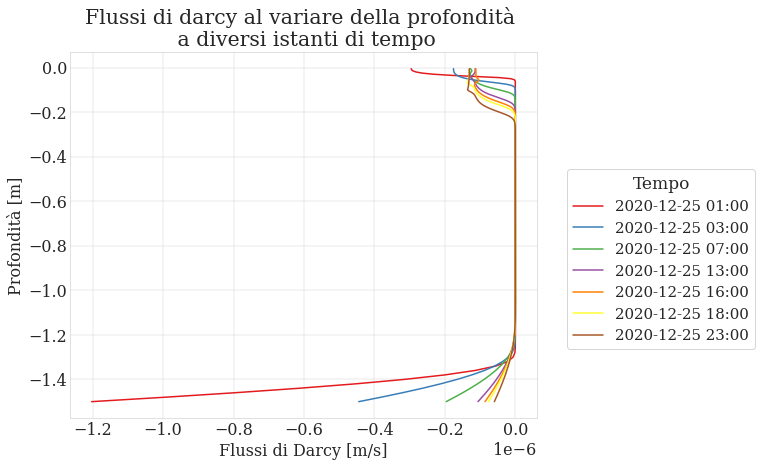

In [10]:
#Profilo dei flussi di darcy al variare della profondità a diversi istanti temporali

fig, ax = plt.subplots(1, 1, sharey='row', figsize=(11, 11/1.618)) 

ds1.darcyVelocity.sel(time='2020-12-25 01:00').plot(ax=ax, y='dualDepth', label='2020-12-25 01:00', color=colors[0])
ds1.darcyVelocity.sel(time='2020-12-25 03:00').plot(ax=ax, y='dualDepth', label='2020-12-25 03:00', color=colors[1])
ds1.darcyVelocity.sel(time='2020-12-25 07:00').plot(ax=ax, y='dualDepth', label='2020-12-25 07:00', color=colors[2])
ds1.darcyVelocity.sel(time='2020-12-25 13:00').plot(ax=ax, y='dualDepth', label='2020-12-25 13:00', color=colors[3])
ds1.darcyVelocity.sel(time='2020-12-25 16:00').plot(ax=ax, y='dualDepth', label='2020-12-25 16:00', color=colors[4])
ds1.darcyVelocity.sel(time='2020-12-25 18:00').plot(ax=ax, y='dualDepth', label='2020-12-25 18:00', color=colors[5])
ds1.darcyVelocity.sel(time='2020-12-25 23:00').plot(ax=ax, y='dualDepth', label='2020-12-25 23:00', color=colors[6])

ax.set_title('Flussi di darcy al variare della profondità \n a diversi istanti di tempo')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Flussi di Darcy [m/s]')
ax.legend(bbox_to_anchor=(1.05,0.7), ncol=1, title="Tempo")

plt.tight_layout()
plt.show()

**Commenti al grafico**

Nel grafico sovrastante si evidenzia la dipedenza dei flussi di Darcy dalla porosità degli strati e dal contenuto d'acqua presente in essi (dipedente a sua volta dalla porosità e dal tempo).

Nel primo strato si denota una maggiore dipendenza della velocità d'infiltrazione dal contenuto d'acqua poichè, nonostante lo strato sia composto da limo e argilla (bassa porosità), la velocità raggiunge valori "elevati" in poco tempo. Si nota inoltre nella parte superficiale dello strato un'elevata variabilità dei flussi.

Nel secondo strato, per tutte le fasce orarie considerate e per tutta la sua profondità, la velocità d'infiltrazione si mantiene su valori "elevati" e pressochè costanti. Tale andamento è dovuto al fatto che il contenuto d'acqua, nello strato di sabbia, non raggiunge mai valori prossimi alla saturazione e di conseguenza la velocità è influenzata maggiormente dalla porosità, costante in tutto lo strato.

In corrispondenza del fondo si ha una dimuzione dei flussi di Darcy causata dall'imposizione della condizione al contorno di free drainage.

---